In [183]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import pandas as pd

In [184]:
# Read CSV file into Pandas DataFrame
df = pd.read_csv('../Project-2 Code/climate_data.csv')
df.head()

Date  Average temperature (°F)  Average humidity (%)  \
0  2009-01-01                      37.8                  35.0   
1  2009-01-02                      43.2                  32.0   
2  2009-01-03                      25.7                  60.0   
3  2009-01-04                       9.3                  67.0   
4  2009-01-05                      23.5                  30.0   

   Average dewpoint (°F)  Average barometer (in)  Average windspeed (mph)  \
0                   12.7                    29.7                     26.4   
1                   14.7                    29.5                     12.8   
2                   12.7                    29.7                      8.3   
3                    0.1                    30.4                      2.9   
4                   -5.3                    29.9                     16.7   

   Average gustspeed (mph)  Average direction (°deg)  Rainfall for month (in)  \
0                     36.8                     274.0                      0.0   
1                     18.0                     240.0                      0.0   
2                     12.2                     290.0                      0.0   
3                      4.5                      47.0                      0.0   
4                     23.1                     265.0                      0.0   

   Rainfall for year (in)  ...  Maximum humidity (%)  Minimum humidity (%)  \
0                     0.0  ...                   4.0                  27.0   
1                     0.0  ...                   4.0                  16.0   
2                     0.0  ...                   8.0                  35.0   
3                     0.0  ...                   7.0                  35.0   
4                     0.0  ...                   5.0                  13.0   

   Maximum pressure  Minimum pressure  Maximum windspeed (mph)  \
0            29.762            29.596                     41.4   
1            29.669            29.268                     35.7   
2            30.232            29.260                     25.3   
3            30.566            30.227                     12.7   
4            30.233            29.568                     38.0   

   Maximum gust speed (mph)  Maximum heat index (°F)       Date1  Month  \
0                      59.0                     40.0  2009-01-01      1   
1                      51.0                     52.0  2009-01-02      1   
2                      38.0                     41.0  2009-01-03      1   
3                      20.0                     32.0  2009-01-04      1   
4                      53.0                     32.0  2009-01-05      1   

   diff_pressure  
0          0.166  
1          0.401  
2          0.972  
3          0.339  
4          0.665  

[5 rows x 23 columns]

In [185]:
df = df.rename(columns={"Rainfall for month (in)":"rainfall_for_month", "Maximum pressure":"max_pressure"})

In [186]:
X = df.rainfall_for_month.values.reshape(-1, 1)
y = df.max_pressure.values.reshape(-1,1)
y

array([[29.762],
       [29.669],
       [30.232],
       ...,
       [29.93 ],
       [29.941],
       [29.792]])

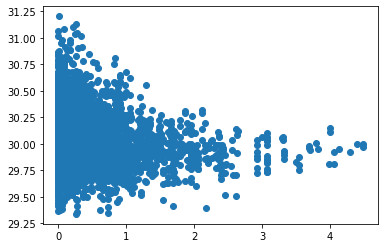

In [187]:
plt.scatter(X,y)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [190]:
X_train_trans = poly.fit_transform(X_train)
X_train_trans

array([[1.    , 0.05  , 0.0025],
       [1.    , 0.39  , 0.1521],
       [1.    , 0.38  , 0.1444],
       ...,
       [1.    , 0.24  , 0.0576],
       [1.    , 0.43  , 0.1849],
       [1.    , 0.23  , 0.0529]])

In [191]:
X_test_trans = poly.transform(X_test)
X_test_trans

array([[1.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 7.00e-02, 4.90e-03],
       [1.00e+00, 2.00e-02, 4.00e-04],
       ...,
       [1.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 1.60e-01, 2.56e-02],
       [1.00e+00, 0.00e+00, 0.00e+00]])

In [192]:
model = LinearRegression()
model.fit(X_train_trans, y_train)

LinearRegression()

In [193]:
y_pred = model.predict(X_test_trans)
y_pred

array([[30.08860165],
       [30.07985842],
       [30.08608034],
       [30.0250342 ],
       [30.08860165],
       [30.06540001],
       [30.08608034],
       [30.08608034],
       [30.04387665],
       [30.08860165],
       [30.0250342 ],
       [30.07375272],
       [30.00769802],
       [30.06072931],
       [30.07496456],
       [30.08860165],
       [30.03322266],
       [30.08482665],
       [30.03322266],
       [29.99270802],
       [30.01617783],
       [30.00954988],
       [30.08860165],
       [30.06657931],
       [30.08860165],
       [30.07985842],
       [30.07618105],
       [30.08860165],
       [30.08608034],
       [30.08860165],
       [30.02204023],
       [30.07375272],
       [30.08860165],
       [29.9601493 ],
       [30.05161105],
       [30.05273456],
       [29.96143398],
       [30.03114765],
       [30.05613299],
       [30.05499553],
       [30.08860165],
       [30.04826841],
       [30.05957325],
       [29.96675868],
       [30.08733867],
       [30

In [194]:
print(r2_score(y_test, y_pred))

0.027909043959499114


In [195]:
print(model.coef_)

[[ 0.         -0.1265304   0.02324482]]


In [196]:
print(model.intercept_)

[30.08860165]


In [197]:
X_new = np.linspace(-3,3,200).reshape(-1,1)
X_new

array([[-3.        ],
       [-2.96984925],
       [-2.93969849],
       [-2.90954774],
       [-2.87939698],
       [-2.84924623],
       [-2.81909548],
       [-2.78894472],
       [-2.75879397],
       [-2.72864322],
       [-2.69849246],
       [-2.66834171],
       [-2.63819095],
       [-2.6080402 ],
       [-2.57788945],
       [-2.54773869],
       [-2.51758794],
       [-2.48743719],
       [-2.45728643],
       [-2.42713568],
       [-2.39698492],
       [-2.36683417],
       [-2.33668342],
       [-2.30653266],
       [-2.27638191],
       [-2.24623116],
       [-2.2160804 ],
       [-2.18592965],
       [-2.15577889],
       [-2.12562814],
       [-2.09547739],
       [-2.06532663],
       [-2.03517588],
       [-2.00502513],
       [-1.97487437],
       [-1.94472362],
       [-1.91457286],
       [-1.88442211],
       [-1.85427136],
       [-1.8241206 ],
       [-1.79396985],
       [-1.7638191 ],
       [-1.73366834],
       [-1.70351759],
       [-1.67336683],
       [-1

In [198]:
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

In [199]:
y_new = model.predict(X_new_poly)
y_new

array([[30.67739624],
       [30.66939729],
       [30.6614406 ],
       [30.65352617],
       [30.64565401],
       [30.63782411],
       [30.63003647],
       [30.6222911 ],
       [30.61458798],
       [30.60692713],
       [30.59930854],
       [30.59173222],
       [30.58419815],
       [30.57670635],
       [30.56925681],
       [30.56184953],
       [30.55448452],
       [30.54716176],
       [30.53988127],
       [30.53264305],
       [30.52544708],
       [30.51829337],
       [30.51118193],
       [30.50411275],
       [30.49708583],
       [30.49010118],
       [30.48315879],
       [30.47625866],
       [30.46940079],
       [30.46258518],
       [30.45581184],
       [30.44908076],
       [30.44239194],
       [30.43574538],
       [30.42914108],
       [30.42257905],
       [30.41605928],
       [30.40958177],
       [30.40314653],
       [30.39675354],
       [30.39040282],
       [30.38409436],
       [30.37782816],
       [30.37160423],
       [30.36542256],
       [30

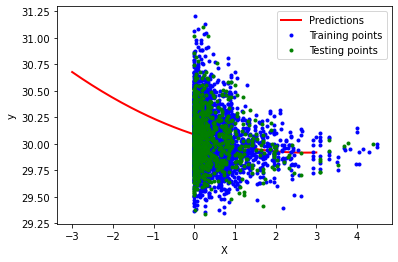

In [200]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [202]:
def polynomial_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

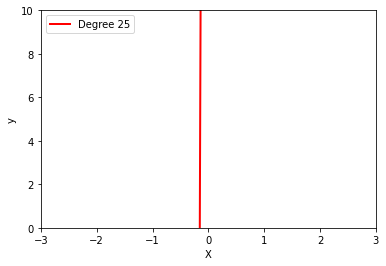

In [203]:
polynomial_regression(25)

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)

<ipython-input-205-6a7e3cdfb0e8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(X, y)


ValueError: Unknown label type: 'continuous'

In [212]:

# Read CSV file into Pandas DataFrame
df = pd.read_csv('../Project-2 Code/climate_data.csv')
df.head()

Date  Average temperature (°F)  Average humidity (%)  \
0  2009-01-01                      37.8                  35.0   
1  2009-01-02                      43.2                  32.0   
2  2009-01-03                      25.7                  60.0   
3  2009-01-04                       9.3                  67.0   
4  2009-01-05                      23.5                  30.0   

   Average dewpoint (°F)  Average barometer (in)  Average windspeed (mph)  \
0                   12.7                    29.7                     26.4   
1                   14.7                    29.5                     12.8   
2                   12.7                    29.7                      8.3   
3                    0.1                    30.4                      2.9   
4                   -5.3                    29.9                     16.7   

   Average gustspeed (mph)  Average direction (°deg)  Rainfall for month (in)  \
0                     36.8                     274.0                      0.0   
1                     18.0                     240.0                      0.0   
2                     12.2                     290.0                      0.0   
3                      4.5                      47.0                      0.0   
4                     23.1                     265.0                      0.0   

   Rainfall for year (in)  ...  Maximum humidity (%)  Minimum humidity (%)  \
0                     0.0  ...                   4.0                  27.0   
1                     0.0  ...                   4.0                  16.0   
2                     0.0  ...                   8.0                  35.0   
3                     0.0  ...                   7.0                  35.0   
4                     0.0  ...                   5.0                  13.0   

   Maximum pressure  Minimum pressure  Maximum windspeed (mph)  \
0            29.762            29.596                     41.4   
1            29.669            29.268                     35.7   
2            30.232            29.260                     25.3   
3            30.566            30.227                     12.7   
4            30.233            29.568                     38.0   

   Maximum gust speed (mph)  Maximum heat index (°F)       Date1  Month  \
0                      59.0                     40.0  2009-01-01      1   
1                      51.0                     52.0  2009-01-02      1   
2                      38.0                     41.0  2009-01-03      1   
3                      20.0                     32.0  2009-01-04      1   
4                      53.0                     32.0  2009-01-05      1   

   diff_pressure  
0          0.166  
1          0.401  
2          0.972  
3          0.339  
4          0.665  

[5 rows x 23 columns]

In [213]:
date = (df["Date"] >= '2016-01-01') & (df["Date"] <= '2019-05-21')

In [214]:
df = df.loc[date]

In [216]:
df = df.set_index("Date", inplace=True)
print(df)

AttributeError: 'NoneType' object has no attribute 'set_index'

In [210]:
from IPython.display import display

In [211]:
display(df.head(5))
display(df.tail(5))

AttributeError: 'NoneType' object has no attribute 'head'